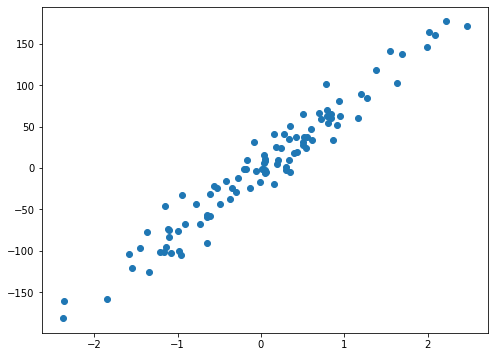

In [28]:
#Prepare Sample Data.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

x,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

fig=plt.figure(figsize=(8,6))
plt.scatter(x[:,0],y)
plt.show()

In [4]:
print(x_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [43]:
#y=wx+b -> w = weight or coefficient ,b = bias or intercept
#update weights and bias
# w=w-(learning rate)(dw)
# b=b-(learning rate)(db)

class LinearRegression:
    
    def __init__(self,lr=0.001,n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None
        
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        for _ in range(self.n_iters):
            y_predicted=np.dot(x,self.weights)+self.bias
            
            dw=1/n_samples * np.dot(x.T,(y_predicted-y))
            db=1/n_samples * np.sum(y_predicted-y)
            
            self.weights=self.weights-self.lr*dw
            self.bias=self.bias-self.lr*db
            
    def predict(self,x):
        y_predicted=np.dot(x,self.weights) + self.bias
        return y_predicted
            
    def mse(self,y_true, y_predicted):
        return np.mean((y_true-y_predicted)**2)        

783.8155465125494


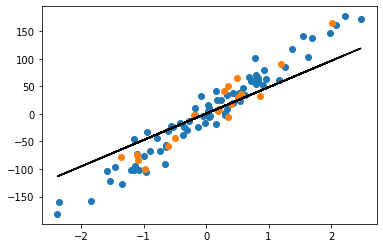

In [48]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
predicted=regressor.predict(x_test)
#predicted
#y_test
mse_value=regressor.mse(y_test,predicted)

print(mse_value)

y_pred_line=regressor.predict(x)
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x,y_pred_line,color='black')
plt.show()

#Below Regression Line is not soo good. and MSE also 783. 
#Change the Learning Rate to 0.01 and see the regression plot and MSE.

305.7719958301902


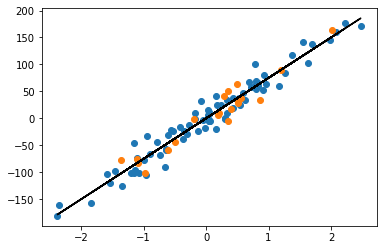

In [49]:
regressor=LinearRegression(lr=0.01)
regressor.fit(x_train,y_train)
predicted=regressor.predict(x_test)
#predicted
#y_test
mse_value=regressor.mse(y_test,predicted)

print(mse_value)

y_pred_line=regressor.predict(x)
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x,y_pred_line,color='black')
plt.show()
#Below Regression Line is pretty much good.